<a href="https://colab.research.google.com/github/Bergu1/neural-network-project/blob/main/projekt1_tacki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import kagglehub
import os
import random

### Sprawdzenie czy mamy możliwość skorzystania z GPU

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

###Pobieramy baze danych z kaggla

In [2]:
path = kagglehub.dataset_download("chrisfilo/fruit-recognition")
print("Path to dataset files:", path)

100%|██████████| 7.92G/7.92G [01:33<00:00, 90.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chrisfilo/fruit-recognition/versions/1


###Tworzymy główny katalog na dane

In [3]:
from pathlib import Path

In [4]:
path = '/root/.cache/kagglehub/datasets/chrisfilo/fruit-recognition/versions/1'
output_path = '/content/fruits'
os.makedirs(f"{output_path}", exist_ok=True)
output_path = Path(output_path)
output_path

PosixPath('/content/fruits')

Sprawdzamy jakie mamy dostępne dane w naszej bazie z kaggla


In [ ]:
files = os.listdir(path)
print("Files in the dataset folder:", files)

Files in the dataset folder: ['Pitaya', 'Pear', 'Guava', 'Kiwi', 'Banana', 'Orange', 'Pomegranate', 'Apple', 'muskmelon', 'Tomatoes', 'Plum', 'Peach', 'Mango', 'Persimmon', 'Carambola']


#!!!!!!!!!!!!! Usuwanie folderów !!!!!!!!!!!!!!!!

In [5]:
import shutil

In [ ]:
for item in os.listdir(output_path):
    item_path = os.path.join(output_path, item)
    if os.path.isdir(item_path):
        shutil.rmtree(item_path)

# Pobieranie danych i kopiowanie do konkretnych utworzonych przez nas folderów
w poniższym przypadku mamy tylko podział na test i train gdybyśmy chcieli mieć podział na test train i validation należało by to zrobić tak:

Najpierw dzielimy dane na zestaw treningowy oraz pozostały (test + walidacja):

**train_images, remaining_images = train_test_split(images, train_size=train_size, random_state=42)**

Następnie dzielimy pozostały zbiór na test i walidację:

**test_images, validation_images = train_test_split(remaining_images, test_size=validation_size, random_state=42)**

Do tych folderów przypisywane są same nazwy obrazków na podstawie których będziemy kopiować dane z datasetu.

In [6]:
categories = ['Banana', 'Orange', 'Kiwi/Kiwi B']
train_size = 800
validation_size = 100
test_size = 100

In [7]:
os.makedirs(f"{output_path}/train", exist_ok=True)
os.makedirs(f"{output_path}/validation", exist_ok=True)
os.makedirs(f"{output_path}/test", exist_ok=True)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
for category in categories:
  category_path = os.path.join(path, category)
  train_category_path = os.path.join(output_path, 'train', category)
  validation_category_path = os.path.join(output_path, 'validation', category)
  test_category_path = os.path.join(output_path, 'test', category)

  os.makedirs(train_category_path, exist_ok=True)
  os.makedirs(validation_category_path, exist_ok=True)
  os.makedirs(test_category_path, exist_ok=True)

  images = os.listdir(category_path)
  train_images, remaining_images = train_test_split(images, train_size=train_size, random_state=42)
  test_images, validation_images = train_test_split(remaining_images, train_size=test_size, test_size=validation_size, random_state=42)

  for img in train_images:
      shutil.copy(os.path.join(category_path, img), os.path.join(train_category_path, img))

  for img in validation_images:
      shutil.copy(os.path.join(category_path, img), os.path.join(validation_category_path, img))

  for img in test_images:
      shutil.copy(os.path.join(category_path, img), os.path.join(test_category_path, img))

In [ ]:
random.seed(42)

image_path_list = list(output_path.glob("*/*/*.png")) # Lista wszystkich obrazków

Wyswietlanie obrazka 1. Metoda

In [ ]:
from PIL import Image

Random image path: /content/fruits/validation/Plum/PlumπÇé834.png
Image class: Plum
Image height: 258
Image width: 320


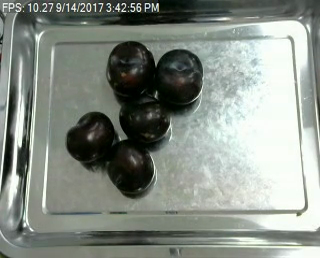

In [ ]:
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem # przypisanie do zmiennej rodzaju owocu losowego obrazka

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Otwieranie obrazka 2. metoda

In [39]:
import numpy as np
import matplotlib.pyplot as plt

TypeError: Image data of dtype <U15 cannot be converted to float

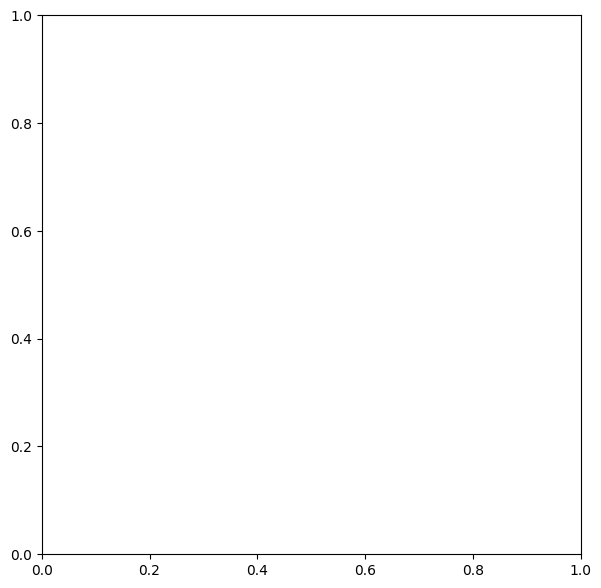

In [38]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

Tworzenie pierwszego data_trasforma, który ostatecznie nie jest wykorzystywany, powstał w celu nauki. Służy on do przetwarzania obrazka na tensory o rozmiarze 64 na 64 z 50% prawdopodobieństwem obrotu

In [ ]:
data_transform = transforms.Compose([
    # zmiana rozmiaru obrazu na 64x64
    transforms.Resize(size=(64, 64)),
    # Losowy obrót obrazu
    transforms.RandomHorizontalFlip(p=0.5), # prawdopodobieństwo obrotu 50%
    # Przekształcenie obrazu w tensor
    transforms.ToTensor()
])

Wizualizacja działania transformacji

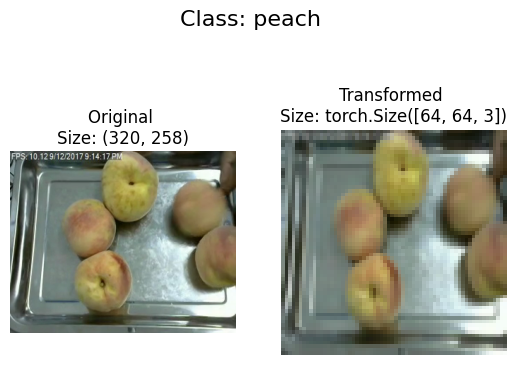

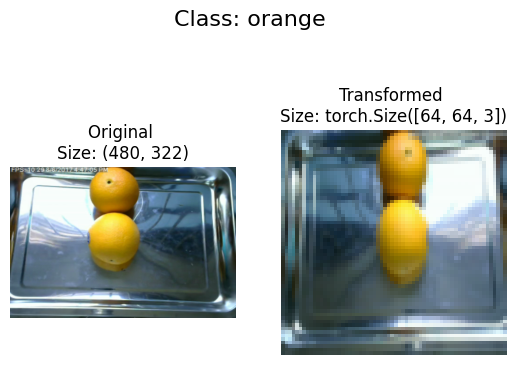

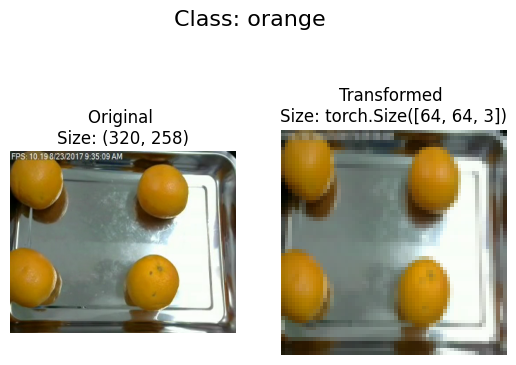

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    # losujemy trzy losowe obrazki
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        # każdy z obrazków otwieramy jako f
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # każdy obrazek przekształcamy w tensor a następnie zamieniamy kolejność channeli w pytorchu
            # jest colour high i width a my chcemy high width colour
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

#Ponowny kod zamiany obrazków na tensory tym razem będzie on już wykorzystywany do nauki oraz testowania naszego modelu

In [10]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    # transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

# Zmiana obrazków w DataSet

In [11]:
import torchvision.datasets as datasets

train_data = datasets.ImageFolder(root=output_path / "train",
                                  transform=train_transforms,
                                  target_transform=None)

validation_data = datasets.ImageFolder(root=output_path / "validation",
                                 transform=test_transforms)

test_data = datasets.ImageFolder(root=output_path / "test",
                                 transform=test_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}, {validation_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 2400
    Root location: /content/fruits/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 300
    Root location: /content/fruits/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           ), Dataset ImageFolder
    Number of datapoints: 300
    Root location: /content/fruits/validation
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [ ]:
# Otrzymanie klas jako lisa
class_names = train_data.classes
# Otrzymanie klas jako slownik
class_dict = train_data.class_to_idx

class_names, class_dict

(['banana', 'orange', 'peach'], {'banana': 0, 'orange': 1, 'peach': 2})

In [ ]:
len(train_data), len(test_data)

(2400, 600)

### Patrzymy na wybrany element w DataSecie

In [ ]:
img, label = train_data[2300][0], train_data[2300][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.4824, 0.5098, 0.4863,  ..., 0.1608, 0.1529, 0.2353],
         [0.5647, 0.5882, 0.5569,  ..., 0.1608, 0.1647, 0.1490],
         [0.4667, 0.4627, 0.4353,  ..., 0.1765, 0.1765, 0.1647],
         ...,
         [0.4706, 0.4784, 0.4471,  ..., 0.7176, 0.7255, 0.7020],
         [0.4353, 0.4588, 0.4510,  ..., 0.9725, 0.9686, 0.9608],
         [0.4314, 0.4431, 0.4392,  ..., 0.9843, 0.9765, 0.9725]],

        [[0.5216, 0.5490, 0.5294,  ..., 0.1804, 0.1686, 0.2824],
         [0.6039, 0.6275, 0.5922,  ..., 0.1804, 0.1765, 0.1765],
         [0.5098, 0.5059, 0.4745,  ..., 0.2000, 0.1922, 0.1804],
         ...,
         [0.5216, 0.5294, 0.5059,  ..., 0.7451, 0.7529, 0.7333],
         [0.4745, 0.5020, 0.4980,  ..., 0.9882, 0.9882, 0.9882],
         [0.4627, 0.4824, 0.4863,  ..., 0.9961, 1.0000, 1.0000]],

        [[0.5333, 0.5490, 0.5176,  ..., 0.1608, 0.1333, 0.2275],
         [0.6078, 0.6275, 0.5882,  ..., 0.1647, 0.1373, 0.1255],
         [0.5020, 0.5020, 0.4745,  ..., 0.17

Wyświetlamy dany element pamiętając o kolejności channeli

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


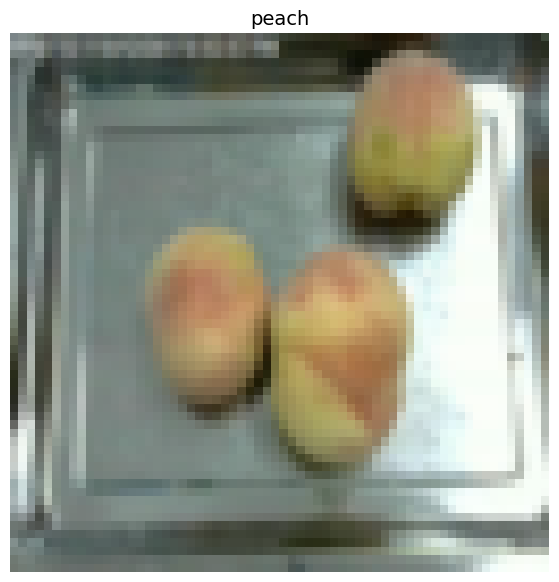

In [ ]:
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14);

# Zmiana obrazka w Dataloader


In [12]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

validation_dataloader = DataLoader(dataset=validation_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, validation_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a5b6879cbb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a5b6879caf0>)

Patrzymy na poszczególny element dataloadera

In [ ]:
img, label = next(iter(train_dataloader)) # iter iteruje 75 batchy a next bierze pierwszy zestaw 32 elementowy

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


#TinyVGG model

In [13]:
from torch import nn

In [18]:
device = "cuda" # w darmowej wersji Google Colab jest limit na GPU

Tworzymy model który składa się z dwóch bloków konwolucyjnych oraz bloku klasyfikującego

In [19]:
class FruitRecognitionModel(nn.Module):
  def __init__ (self, input_shape: int, hidden_units: int, output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0,
                    ),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                      stride=2),
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(2)
          )

      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*13*13,
                    out_features=output_shape)
          )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_0 = FruitRecognitionModel(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

FruitRecognitionModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[1.9423e-02, 4.0424e-05, 8.3289e-03]])

Output prediction probabilities:
tensor([[0.3367, 0.3303, 0.3330]])

Output prediction label:
tensor([0])

Actual label:
1


In [ ]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
FruitRecognitionModel                    [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

Inicjalizujemy nasze loss_function oraz naszego optimizera

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [21]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

Wstępne analizowanie przebiegu trenowania

In [ ]:
for train in range(10):
  train_loss, train_acc = train_step(model_0, train_dataloader, loss_fn, optimizer)
  print(f"Epoch: {train} Loss {train_loss} Accuracy: {train_acc}")

In [22]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
test_loss, test_acc = test_step(model_0, train_dataloader, loss_fn)
print(f"Loss {test_loss} Accuracy: {test_acc}")

### Ostateczna funkcja uczenia

In [23]:
from tqdm.auto import tqdm

In [24]:
count = 0

In [25]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          validation_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001),
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 30,
          save_path: str = "best_model.pth"):

    results = {"train_loss": [],
              "train_acc": [],
              "validation_loss": [],
              "validation_acc": []}

    best_test_acc = 0.0

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)

        validation_loss, validation_acc = test_step(model=model,
                                    dataloader=validation_dataloader,
                                    loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"validation_loss: {validation_loss:.4f} | "
            f"validation_acc: {validation_acc:.4f}"
        )


        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["validation_loss"].append(validation_loss.item() if isinstance(validation_loss, torch.Tensor) else validation_loss)
        results["validation_acc"].append(validation_acc.item() if isinstance(validation_acc, torch.Tensor) else validation_acc)
        print(validation_acc)
        if validation_acc > best_test_acc:
            best_test_acc = validation_acc
            count = 0
            torch.save(model.state_dict(), save_path)
            print(f"Best model updated at epoch {epoch+1} with test_acc: {validation_acc:.4f}")
        else:
          count += 1

        if count == 7:
          print("Lack of any improvement")
          break


    return results

In [33]:
model_0_results = train(model_0, train_dataloader, validation_dataloader)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.0062 | train_acc: 0.9983 | validation_loss: 0.0095 | validation_acc: 0.9969
0.996875
Best model updated at epoch 1 with test_acc: 0.9969
Epoch: 2 | train_loss: 0.0040 | train_acc: 0.9992 | validation_loss: 0.0058 | validation_acc: 0.9969
0.996875
Epoch: 3 | train_loss: 0.0047 | train_acc: 0.9992 | validation_loss: 0.0058 | validation_acc: 0.9969
0.996875
Epoch: 4 | train_loss: 0.0060 | train_acc: 0.9988 | validation_loss: 0.0187 | validation_acc: 0.9938
0.99375
Epoch: 5 | train_loss: 0.0044 | train_acc: 0.9992 | validation_loss: 0.0036 | validation_acc: 1.0000
1.0
Best model updated at epoch 5 with test_acc: 1.0000
Epoch: 6 | train_loss: 0.0041 | train_acc: 0.9988 | validation_loss: 0.0043 | validation_acc: 1.0000
1.0
Epoch: 7 | train_loss: 0.0067 | train_acc: 0.9975 | validation_loss: 0.0321 | validation_acc: 0.9938
0.99375
Epoch: 8 | train_loss: 0.0049 | train_acc: 0.9988 | validation_loss: 0.0227 | validation_acc: 0.9906
0.990625
Epoch: 9 | train_loss: 0.012

In [ ]:
model_0.load_state_dict(torch.load("best_model.pth"))
model_0

<ipython-input-28-a9551d43861b>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_0.load_state_dict(torch.load("best_model.pth"))


FruitRecognitionModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=8, bias=True)
  )
)

In [ ]:
def final_test(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module = nn.CrossEntropyLoss()):
    test_loss, test_acc = test_step(model=model,
                                dataloader=dataloader,
                                loss_fn=loss_fn)
    print(f"Test loss: {test_loss} Test acc: {test_acc}")

In [ ]:
final_test(model_0, test_dataloader)

Test loss: 0.03707768548280001 Test acc: 0.98625


In [36]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    validation_loss = results['validation_loss']

    # Get the accuracy values of the results dictionary (training and test)
    train_acc = results['train_acc']
    validation_acc = results['validation_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, validation_loss, label='validation_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='train_accuracy')
    plt.plot(epochs, validation_acc, label='validation_acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

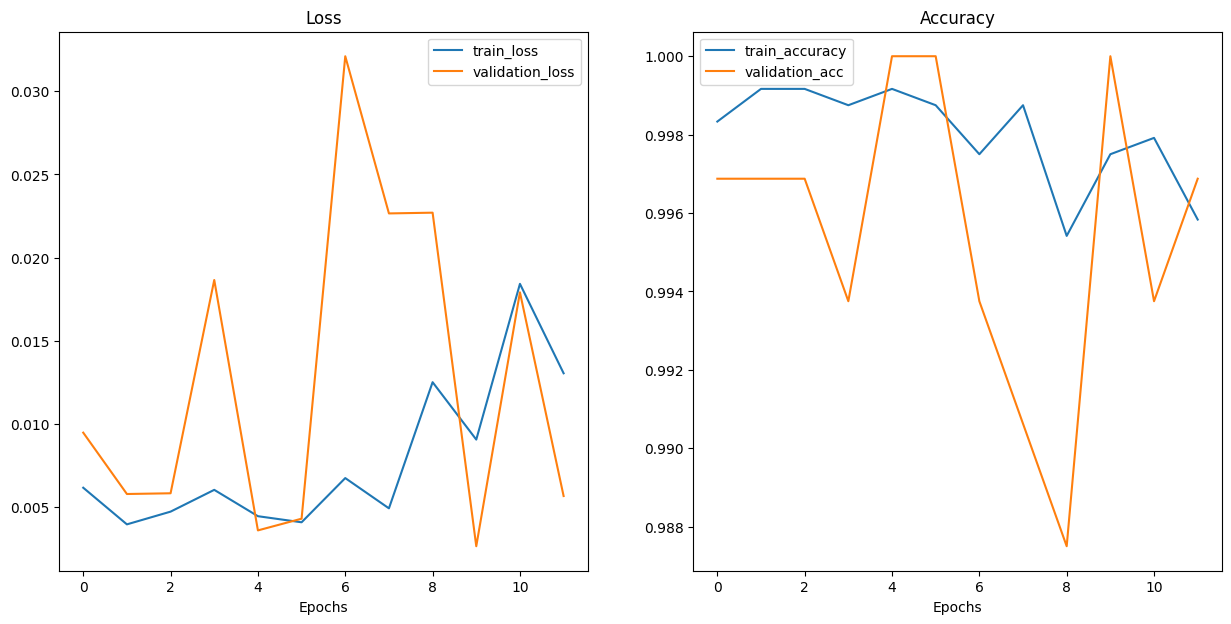

In [40]:
plot_loss_curves(model_0_results)